In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned stats
nta_cleaned = pd.read_csv("data/nta_fine_stats_cleaned.csv")

# Load for choropleth
geo_merged = gpd.read_file("data/nta_with_fine_stats.geojson")


## 📈 Cell 1: Visualize Top 10 Neighborhoods by Fine Density
This creates a horizontal bar chart using Seaborn, showing the top 10 NYC neighborhoods with the most fines per 1,000 people.
It helps communicate which areas have the most intense fine activity relative to population.

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_68324/2225916080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='fines_per_1000', y='ntaname', palette='viridis')


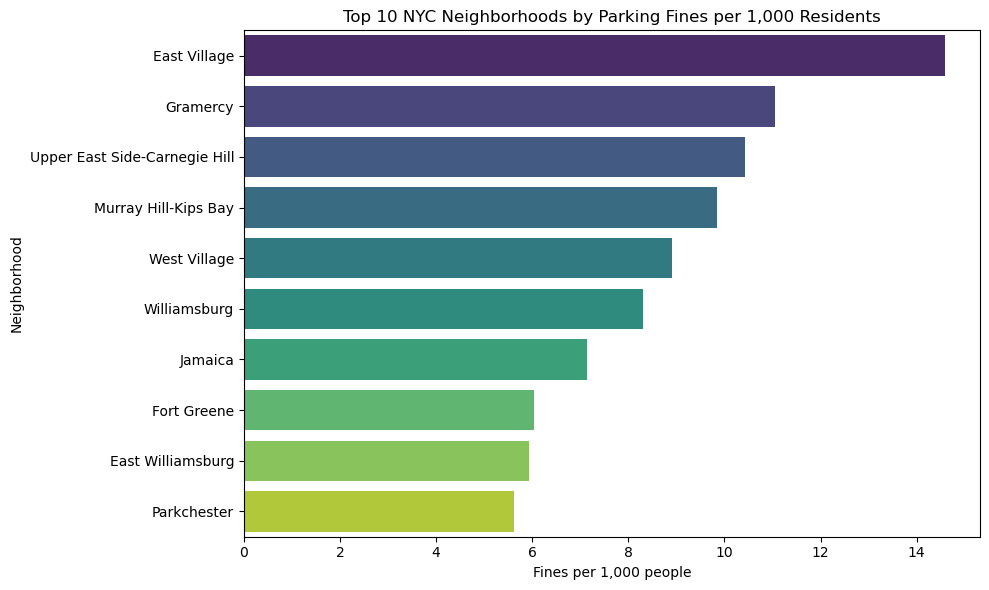

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = nta_cleaned.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='fines_per_1000', y='ntaname', palette='viridis')
plt.title("Top 10 NYC Neighborhoods by Parking Fines per 1,000 Residents")
plt.xlabel("Fines per 1,000 people")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()


## 🗺️ Cell 2: Choropleth Map of Fines per 1,000 People
Finally, we merge the fine statistics back into the original GeoJSON file and use GeoPandas to generate a choropleth map of NYC.
Neighborhoods are colored by the number of fines per 1,000 people, creating an intuitive, visual overview of fine intensity across the city.

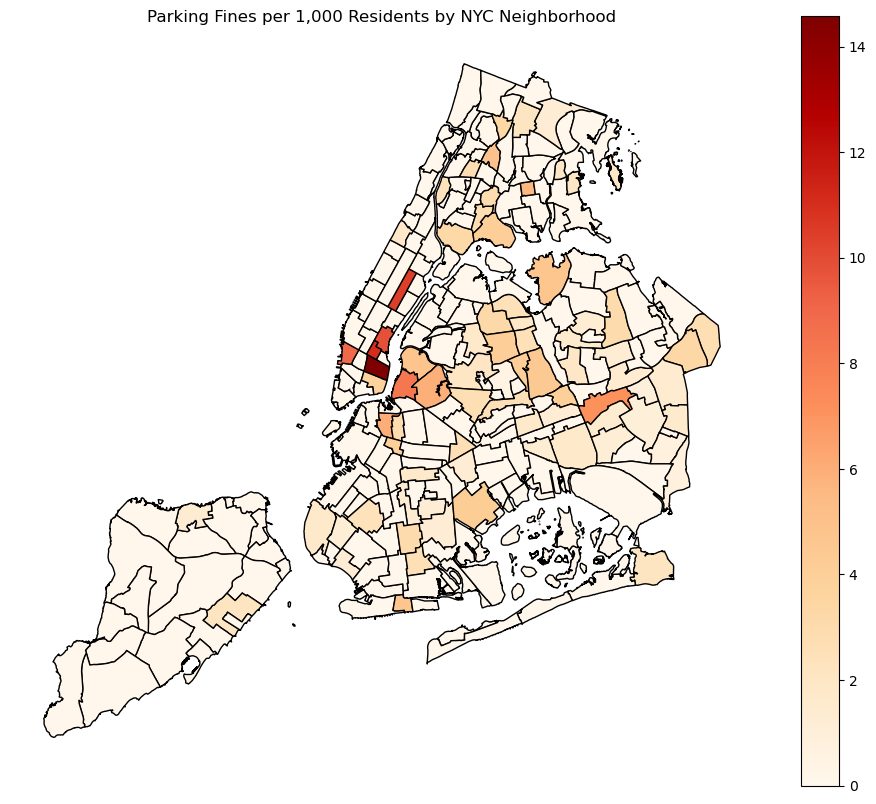

In [4]:
geo_merged['fines_per_1000'] = geo_merged['fines_per_1000'].fillna(0)

# Plot map
geo_merged.plot(
    column='fines_per_1000',
    cmap='OrRd',
    legend=True,
    figsize=(12, 10),
    edgecolor='black'
)
plt.title("Parking Fines per 1,000 Residents by NYC Neighborhood")
plt.axis('off')
plt.show()


## 🗺️ Cell 3: Dot Map of Individual Parking Violations

To complement the choropleth, we visualize each individual parking fine as a red dot plotted by its exact geographic location.
This dot map provides a raw, street-level view of where violations occur, highlighting real-world enforcement hotspots in areas like Midtown and Downtown Brooklyn.
It mirrors point-pattern techniques from class and helps us see spatial clustering without relying on neighborhood boundaries.


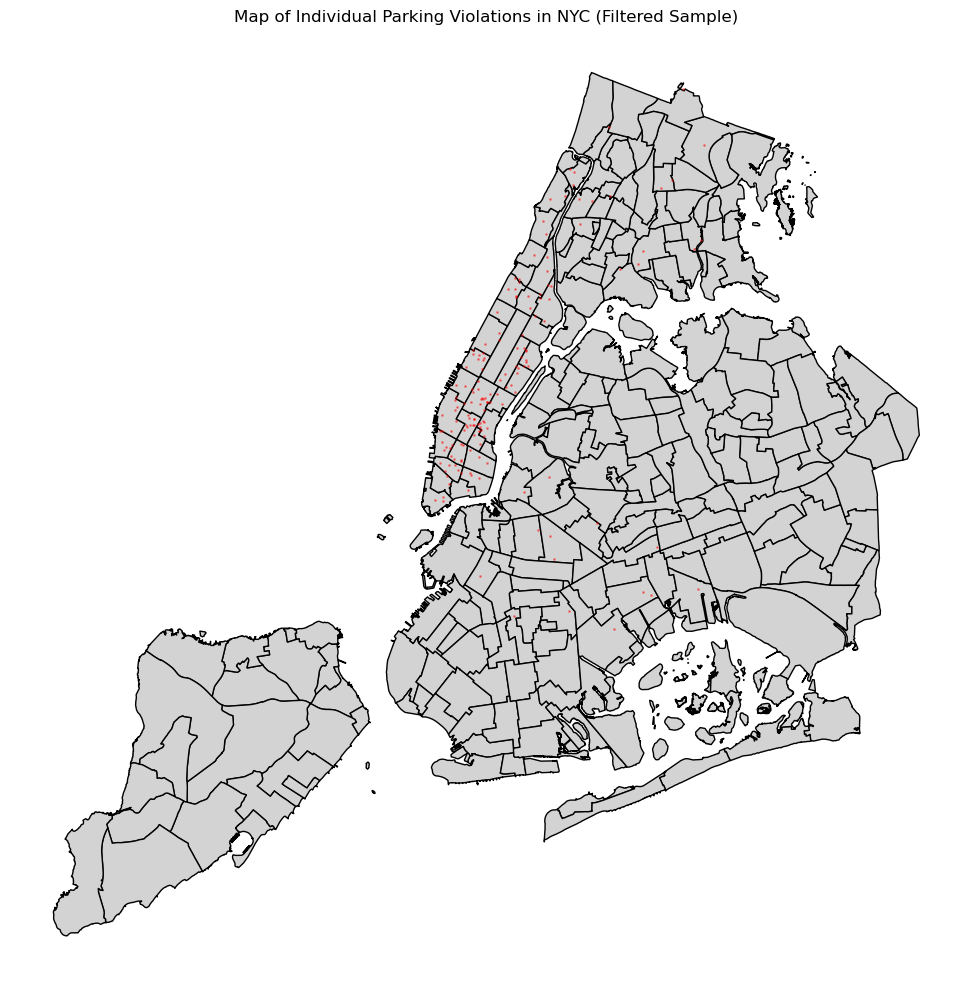

In [ ]:
df = pd.read_csv("geocoded_fines_sample.csv")
df = df[(df['lat'].between(40.49, 40.92)) & (df['lon'].between(-74.26, -73.68))]
df = df.dropna(subset=['lat', 'lon'])

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs="EPSG:4326")
geo_merged = gpd.read_file("data/nta_with_fine_stats.geojson")

fig, ax = plt.subplots(figsize=(10, 10))
geo_merged.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, markersize=1, color='red', alpha=0.4)
plt.title("Map of Individual Parking Violations in NYC (Filtered Sample)")
plt.axis('off')
plt.tight_layout()
plt.show()


This map shows the exact locations of individual parking violations across NYC, with each red dot representing a single fine. It reveals clusters in areas like Midtown Manhattan and Downtown Brooklyn, highlighting where enforcement is most concentrated.


In [26]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load your geocoded NYC data
df = df[(df['lat'].between(40.49, 40.92)) & (df['lon'].between(-74.26, -73.68))].dropna()

# Initialize Folium map centered on Manhattan
nyc_map = folium.Map(location=[40.75, -73.93], zoom_start=11)
40.730610, -73.935242
# Create list of coordinates
heat_data = df[["lat", "lon"]].values.tolist()

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(nyc_map)

# Display the map (in Jupyter), or use .save("map.html") to export
nyc_map
